Loading training dataset...
Training dataset loaded successfully.
Loading testing dataset...
Testing dataset loaded successfully.
Splitting features and target variable...
Training features shape: (346977,), Training target shape: (346977,)
Testing features shape: (86587,), Testing target shape: (86587,)
Vectorizing the text data...
Text data vectorized.
Initializing the models...
Training the Naive Bayes model...
Naive Bayes model trained successfully.
Training the MLP model...
Iteration 1, loss = 0.10386604
Validation score: 0.995072
Iteration 2, loss = 0.01505495
Validation score: 0.998040
Iteration 3, loss = 0.00781102
Validation score: 0.998645
Iteration 4, loss = 0.00500007
Validation score: 0.998905
Iteration 5, loss = 0.00360777
Validation score: 0.999193
Iteration 6, loss = 0.00282947
Validation score: 0.999135
Iteration 7, loss = 0.00238829
Validation score: 0.999135
Iteration 8, loss = 0.00209252
Validation score: 0.999193
Iteration 9, loss = 0.00189317
Validation score: 0.9

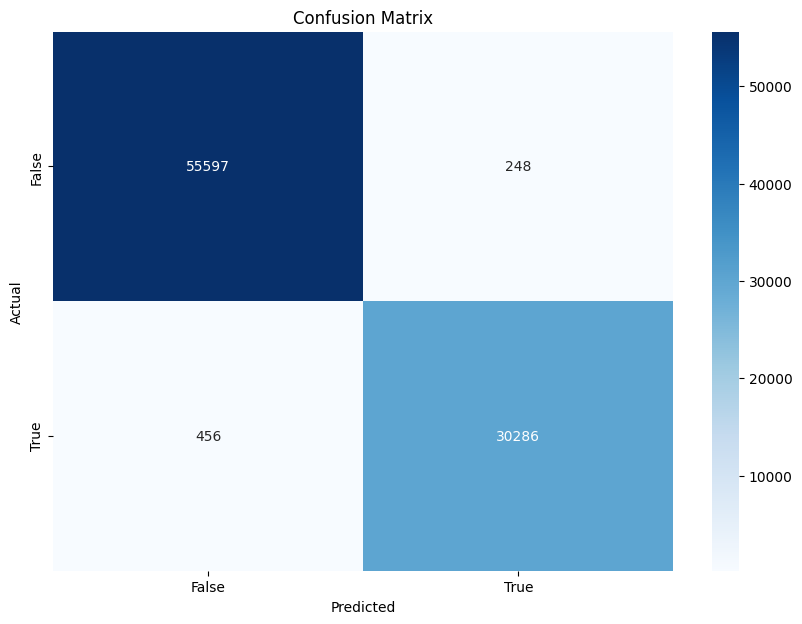

Evaluating the performance of individual models...
Naive Bayes Model Accuracy: 0.95
MLP Model Accuracy: 0.99


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
train_file_path = r'./final_train.csv'
print("Loading training dataset...")
train_data = pd.read_csv(train_file_path)
print("Training dataset loaded successfully.")

# Load the testing dataset
test_file_path = r'./final_test.csv'
print("Loading testing dataset...")
test_data = pd.read_csv(test_file_path)
print("Testing dataset loaded successfully.")

print("Splitting features and target variable...")
# Assuming the text column is named 'text' and the target column is named 'label'
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']
print(f"Training features shape: {X_train.shape}, Training target shape: {y_train.shape}")
print(f"Testing features shape: {X_test.shape}, Testing target shape: {y_test.shape}")

print("Vectorizing the text data...")
# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
print("Text data vectorized.")

print("Initializing the models...")
# Initialize the models
nb_model = MultinomialNB()
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, random_state=42, verbose=True, early_stopping=True)

print("Training the Naive Bayes model...")
# Train the Naive Bayes model
nb_model.fit(X_train_vect, y_train)
print("Naive Bayes model trained successfully.")

print("Training the MLP model...")
# Train the MLP model
mlp_model.fit(X_train_vect, y_train)
print("MLP model trained successfully.")

print("Creating an ensemble of the models using VotingClassifier...")
# Create an ensemble of the models using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('naive_bayes', nb_model),
    ('mlp', mlp_model)
], voting='soft')  # 'soft' voting uses predicted probabilities

print("Training the ensemble model...")
# Train the ensemble model
ensemble_model.fit(X_train_vect, y_train)
print("Ensemble model trained successfully.")

print("Making predictions with the ensemble model...")
# Make predictions
y_pred = ensemble_model.predict(X_test_vect)
print("Predictions made successfully.")

print("Evaluating the performance of the ensemble model...")
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Ensemble Model Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Plotting the confusion matrix...")
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Evaluating the performance of individual models...")
# You can also evaluate the individual models
nb_pred = nb_model.predict(X_test_vect)
mlp_pred = mlp_model.predict(X_test_vect)

print(f"Naive Bayes Model Accuracy: {accuracy_score(y_test, nb_pred):.2f}")
print(f"MLP Model Accuracy: {accuracy_score(y_test, mlp_pred):.2f}")
